In [313]:
from datasets import load_dataset

In [314]:
import pandas as pd

In [315]:
import numpy as np

In [316]:
from matplotlib.ticker import FuncFormatter

In [317]:
from matplotlib import pyplot as plt

In [318]:
import ast

In [319]:
import itertools

In [320]:
dataset = load_dataset('lukebarousse/data_jobs')

In [321]:
dataframe = dataset['train'].to_pandas()

In [322]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [323]:
dataframe[['job_title_short','salary_year_avg','job_country']].sort_values(by='salary_year_avg')[(dataframe.salary_year_avg != 'NaN') & (dataframe.salary_year_avg > 100000) & (dataframe.job_country == 'Sudan' )]                                                             

/tmp/ipykernel_4972/2487221530.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataframe[['job_title_short','salary_year_avg','job_country']].sort_values(by='salary_year_avg')[(dataframe.salary_year_avg != 'NaN') & (dataframe.salary_year_avg > 100000) & (dataframe.job_country == 'Sudan' )]


,job_title_short,salary_year_avg,job_country
541552,Data Analyst,100450.000000,Sudan
771454,Data Analyst,100500.000000,Sudan
174768,Data Scientist,100728.578125,Sudan
317978,Data Scientist,100783.000000,Sudan
421287,Data Scientist,100783.000000,Sudan
...,...,...,...
65724,Senior Data Analyst,375000.000000,Sudan
428547,Data Engineer,390000.000000,Sudan
669400,Senior Data Engineer,425000.000000,Sudan
673388,Data Engineer,450000.000000,Sudan


In [324]:
dataAnalystSalary = dataframe['salary_year_avg'][(dataframe.job_title_short == 'Data Analyst')&(dataframe.salary_year_avg != 'NaN')]

In [325]:
dataAnalystSalary.dropna(axis=0).head(10)

109      89000.00
180      90250.00
410     133285.00
988      62623.00
1413     71300.00
1490     43200.00
1555    111175.00
1587     89111.75
1681    111175.00
1684    120000.00
Name: salary_year_avg, dtype: float64

In [326]:
np.nanmean(dataAnalystSalary)

np.float64(93841.90785449345)

In [327]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [328]:
dataframe.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [329]:
for i,d in enumerate(dataframe.job_title_short.unique()):
    print(i+1, d)

1 Senior Data Engineer
2 Data Analyst
3 Data Engineer
4 Business Analyst
5 Data Scientist
6 Machine Learning Engineer
7 Senior Data Analyst
8 Cloud Engineer
9 Senior Data Scientist
10 Software Engineer


In [330]:
(dataframe['job_title_short'][dataframe.job_title_short == 'Data Analyst']).describe()

count           196075
unique               1
top       Data Analyst
freq            196075
Name: job_title_short, dtype: object

In [331]:
dataframe.describe()

,salary_year_avg,salary_hour_avg
count,22003.000000,10662.000000
mean,123286.274072,47.016598
std,48312.449482,21.890738
min,15000.000000,8.000000
25%,90000.000000,27.500000
50%,115000.000000,45.980000
75%,150000.000000,61.159996
max,960000.000000,391.000000


In [332]:
dataframe.job_title_short.unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [333]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [334]:
type(dataframe.job_posted_date[0])

str

In [335]:
pd.to_datetime(dataframe.job_posted_date)

0        2023-06-16 13:44:15
1        2023-01-14 13:18:07
2        2023-10-10 13:14:55
3        2023-07-04 13:01:41
4        2023-08-07 14:29:36
                 ...        
785736   2023-03-13 06:16:16
785737   2023-03-12 06:18:18
785738   2023-03-12 06:32:36
785739   2023-03-12 06:32:15
785740   2023-03-13 06:16:31
Name: job_posted_date, Length: 785741, dtype: datetime64[ns]

In [336]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785723 non-nu

In [337]:
dataframe['job_posted_date'] = pd.to_datetime(dataframe.job_posted_date)

In [338]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [339]:
dataframe.job_posted_date.dt.year

0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
785736    2023
785737    2023
785738    2023
785739    2023
785740    2023
Name: job_posted_date, Length: 785741, dtype: int32

In [340]:
dataframe['job_posted_date_year'] = dataframe.job_posted_date.dt.year

In [341]:
dataframe.sort_values(by='job_posted_date',ascending=True)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
108804,Data Analyst,Data Analyst,"New York, NY",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:04,False,False,United States,None,NaN,NaN,Metasys Technologies,"['sql', 'snowflake', 'visio', 'jira', 'conflue...","{'analyst_tools': ['visio'], 'async': ['jira',...",2023
96906,Data Analyst,Data Analyst,"Bloomfield, CT",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:07,True,False,United States,None,NaN,NaN,Diverse Lynx,"['sql', 'sas', 'sas']","{'analyst_tools': ['sas'], 'programming': ['sq...",2023
98438,Data Analyst,Data Analyst,"Washington, DC",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:22,False,True,United States,None,NaN,NaN,Guidehouse,"['sql', 'python', 'r', 'azure', 'snowflake', '...","{'analyst_tools': ['tableau', 'excel'], 'cloud...",2023
110290,Data Analyst,Data Analyst,"Fairfax, VA",via CareerBuilder,Full-time,False,"New York, United States",2023-01-01 00:00:24,False,False,United States,None,NaN,NaN,Protask,"['sql', 'jira']","{'async': ['jira'], 'programming': ['sql']}",2023
72158,Senior Data Analyst,Senior Data Analyst / Platform Experience,"Worcester, MA",via LinkedIn,Full-time,False,"New York, United States",2023-01-01 00:00:27,False,True,United States,None,NaN,NaN,Atria Wealth Solutions,"['sql', 'atlassian', 'jira']","{'async': ['jira'], 'other': ['atlassian'], 'p...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362129,Data Engineer,Data engineer,"Sunnyvale, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,True,False,Sudan,None,NaN,NaN,ITCO Solutions,"['sql', 'python', 'java', 'snowflake', 'airflo...","{'cloud': ['snowflake'], 'libraries': ['airflo...",2023
351830,Data Engineer,Data engineer,"San Francisco, CA",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:31,False,False,Sudan,None,NaN,NaN,JBL Resources,"['azure', 'power bi', 'word']","{'analyst_tools': ['power bi', 'word'], 'cloud...",2023
327439,Data Engineer,Staff engineer data,"Southfield, MI",via Talent.com,Full-time,False,Sudan,2023-12-31 23:40:32,False,False,Sudan,year,140000.0,NaN,Credit Acceptance,"['express', 'kubernetes']","{'other': ['kubernetes'], 'webframeworks': ['e...",2023
112373,Senior Data Analyst,Marketing Data & Analytics Product Owner - Sen...,"Boston, MA (+1 other)",via Boston Consulting Group,Full-time,False,"New York, United States",2023-12-31 23:59:58,False,False,United States,None,NaN,NaN,Boston Consulting Group,"['sql', 'python', 'r', 'gdpr', 'tableau', 'pow...","{'analyst_tools': ['tableau', 'power bi'], 'li...",2023


In [342]:
dataframe.dropna(subset='salary_year_avg')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",2023
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2023
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",2023
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",2023


In [343]:
dataframe.dropna(subset=['salary_year_avg'])

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,NaN,Netskope,"['gdpr', 'excel']","{'analyst_tools': ['excel'], 'libraries': ['gd...",2023
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,NaN,Intelletec,"['mongodb', 'mongodb', 'python', 'r', 'sql', '...","{'analyst_tools': ['tableau'], 'cloud': ['orac...",2023
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"['sql', 'python']","{'programming': ['sql', 'python']}",2023
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"['sql', 'r', 'python', 'express']","{'programming': ['sql', 'r', 'python'], 'webfr...",2023
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"['python', 'r', 'alteryx', 'tableau']","{'analyst_tools': ['alteryx', 'tableau'], 'pro...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"['go', 'python', 'r', 'sql', 'oracle', 'window...","{'analyst_tools': ['alteryx', 'power bi', 'tab...",2023
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None,2023
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"['python', 'azure', 'snowflake', 'spark']","{'cloud': ['azure', 'snowflake'], 'libraries':...",2023
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,NaN,Bosch Group,"['python', 'hadoop', 'spark', 'airflow', 'kube...","{'libraries': ['hadoop', 'spark', 'airflow'], ...",2023


In [344]:
dataframe.describe()

,job_posted_date,salary_year_avg,salary_hour_avg,job_posted_date_year
count,785741,22003.000000,10662.000000,785741.0
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598,2023.0
min,2023-01-01 00:00:04,15000.000000,8.000000,2023.0
25%,2023-03-20 10:05:48,90000.000000,27.500000,2023.0
50%,2023-06-29 06:11:38,115000.000000,45.980000,2023.0
75%,2023-09-27 01:01:16,150000.000000,61.159996,2023.0
max,2023-12-31 23:59:58,960000.000000,391.000000,2023.0
std,NaN,48312.449482,21.890738,0.0


In [345]:
# dataframe.dropna(subset='salary_year_avg',inplace= True)

In [346]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [347]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [348]:
dataframe.describe()

,job_posted_date,salary_year_avg,salary_hour_avg,job_posted_date_year
count,785741,22003.000000,10662.000000,785741.0
mean,2023-06-25 16:02:11.860248576,123286.274072,47.016598,2023.0
min,2023-01-01 00:00:04,15000.000000,8.000000,2023.0
25%,2023-03-20 10:05:48,90000.000000,27.500000,2023.0
50%,2023-06-29 06:11:38,115000.000000,45.980000,2023.0
75%,2023-09-27 01:01:16,150000.000000,61.159996,2023.0
max,2023-12-31 23:59:58,960000.000000,391.000000,2023.0
std,NaN,48312.449482,21.890738,0.0


In [349]:
dataframe['salary_year_avg'].min()

np.float64(15000.0)

In [350]:
min_salary = dataframe.salary_year_avg.min()

In [351]:
int(min_salary)

15000

In [352]:
dataframe.iloc[int(min_salary)]

job_title_short                                               Data Analyst
job_title                        Alternant Data Analyst/Scientist/Engineer
job_location                                                  Rezé, France
job_via                                                         via Indeed
job_schedule_type                                                Full-time
job_work_from_home                                                   False
search_location                                                     France
job_posted_date                                        2023-08-01 13:27:55
job_no_degree_mention                                                False
job_health_insurance                                                 False
job_country                                                         France
salary_rate                                                           None
salary_year_avg                                                        NaN
salary_hour_avg          

In [353]:
dataframe['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

In [354]:
for i in dataframe['job_title_short'].value_counts():
    print(i)

196075
186241
172286
49063
44929
44563
36957
29216
14080
12331


In [355]:
dataframe.groupby('job_title_short')[['salary_year_avg','salary_hour_avg']].median()

,salary_year_avg,salary_hour_avg
job_title_short,,
Business Analyst,85000.0,40.362499
Cloud Engineer,90000.0,40.000000
Data Analyst,90000.0,32.615002
Data Engineer,125000.0,58.500000
Data Scientist,127500.0,47.500000
Machine Learning Engineer,106415.0,47.535000
Senior Data Analyst,111175.0,47.500000
Senior Data Engineer,147500.0,61.500000
Senior Data Scientist,155500.0,47.620003


In [356]:
dataframe.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median'])

,min,max,median
job_title_short,,,
Business Analyst,16500.0,387460.0,85000.0
Cloud Engineer,42000.0,280000.0,90000.0
Data Analyst,25000.0,650000.0,90000.0
Data Engineer,15000.0,525000.0,125000.0
Data Scientist,27000.0,960000.0,127500.0
Machine Learning Engineer,30000.0,325000.0,106415.0
Senior Data Analyst,30000.0,425000.0,111175.0
Senior Data Engineer,35000.0,425000.0,147500.0
Senior Data Scientist,45000.0,890000.0,155500.0


In [357]:
sudan_jobs = dataframe[dataframe['job_country'] == 'Sudan']
sudan_jobs = sudan_jobs[sudan_jobs['salary_year_avg'].notna()]
sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median'])
sudan_jobs_salary_scale = sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median']).sort_values('median')
sudan_jobs_salary_scale

,min,max,median
job_title_short,,,
Cloud Engineer,58000.5,82830.0,70415.25
Business Analyst,50282.0,121500.0,82665.00
Data Analyst,40000.0,190000.0,87500.00
Software Engineer,83897.0,205000.0,100000.00
Senior Data Analyst,65000.0,375000.0,111175.00
Data Engineer,25000.0,450000.0,127500.00
Data Scientist,32000.0,550000.0,130000.00
Senior Data Engineer,90000.0,425000.0,147500.00
Senior Data Scientist,79019.0,262500.0,155000.00


In [358]:
sudan_jobs.groupby('job_title_short')['salary_year_avg'].count()

job_title_short
Business Analyst              30
Cloud Engineer                 2
Data Analyst                 123
Data Engineer                501
Data Scientist               565
Machine Learning Engineer     16
Senior Data Analyst           27
Senior Data Engineer         161
Senior Data Scientist        179
Software Engineer             19
Name: salary_year_avg, dtype: int64

In [359]:
sudan_jobs.groupby('job_title_short')[['salary_year_avg']].agg(['min','max','median','count'])

salary_year_avg                           
                                      min       max     median count
job_title_short                                                     
Business Analyst                  50282.0  121500.0   82665.00    30
Cloud Engineer                    58000.5   82830.0   70415.25     2
Data Analyst                      40000.0  190000.0   87500.00   123
Data Engineer                     25000.0  450000.0  127500.00   501
Data Scientist                    32000.0  550000.0  130000.00   565
Machine Learning Engineer         85000.0  325000.0  165659.00    16
Senior Data Analyst               65000.0  375000.0  111175.00    27
Senior Data Engineer              90000.0  425000.0  147500.00   161
Senior Data Scientist             79019.0  262500.0  155000.00   179
Software Engineer                 83897.0  205000.0  100000.00    19

In [360]:
sudan_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')

,min,max,median,count
job_title_short,,,,
Cloud Engineer,58000.5,82830.0,70415.25,2
Business Analyst,50282.0,121500.0,82665.00,30
Data Analyst,40000.0,190000.0,87500.00,123
Software Engineer,83897.0,205000.0,100000.00,19
Senior Data Analyst,65000.0,375000.0,111175.00,27
Data Engineer,25000.0,450000.0,127500.00,501
Data Scientist,32000.0,550000.0,130000.00,565
Senior Data Engineer,90000.0,425000.0,147500.00,161
Senior Data Scientist,79019.0,262500.0,155000.00,179


In [361]:
egypt_jobs = dataframe[(dataframe['job_country'] == 'Egypt')]

egypt_jobs = egypt_jobs[egypt_jobs['salary_year_avg'].notna()]

egypt_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')
egypt_jobs_salary_scale = egypt_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count']).sort_values('median')
egypt_jobs_salary_scale

,min,max,median,count
job_title_short,,,,
Data Analyst,50400.0,75550.0,54257.00,4
Data Engineer,45000.0,147500.0,87986.50,6
Senior Data Scientist,79200.0,90670.0,88128.00,3
Senior Data Engineer,96773.0,96773.0,96773.00,1
Data Scientist,70000.0,157500.0,98554.75,4
Machine Learning Engineer,72000.0,166000.0,119000.00,2


In [362]:
sudan_jobs_salary_scale
egypt_jobs_salary_scale

,min,max,median,count
job_title_short,,,,
Data Analyst,50400.0,75550.0,54257.00,4
Data Engineer,45000.0,147500.0,87986.50,6
Senior Data Scientist,79200.0,90670.0,88128.00,3
Senior Data Engineer,96773.0,96773.0,96773.00,1
Data Scientist,70000.0,157500.0,98554.75,4
Machine Learning Engineer,72000.0,166000.0,119000.00,2


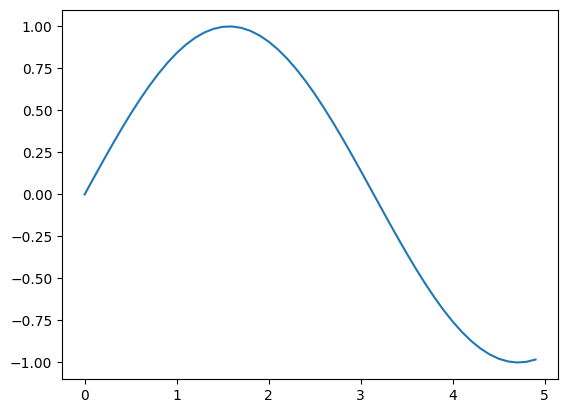

In [363]:
x = np.arange(0,5,0.1)
sinx = np.sin(x)
plt.plot(x,sinx)

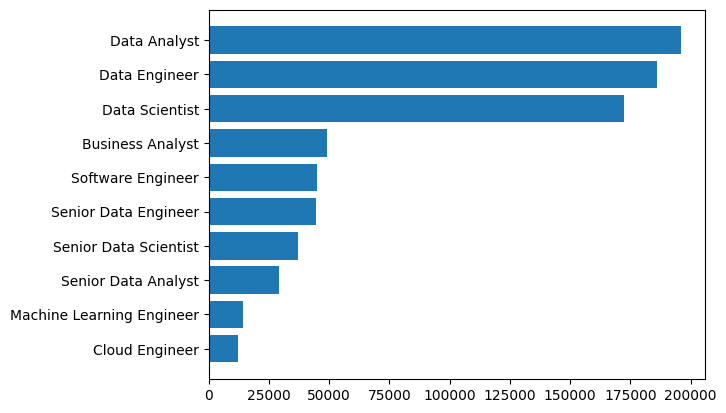

In [364]:
job_counts = dataframe.job_title_short.value_counts().sort_values(ascending=True)

plt.barh(job_counts.index,job_counts)
plt.show()

<BarContainer object of 10 artists>

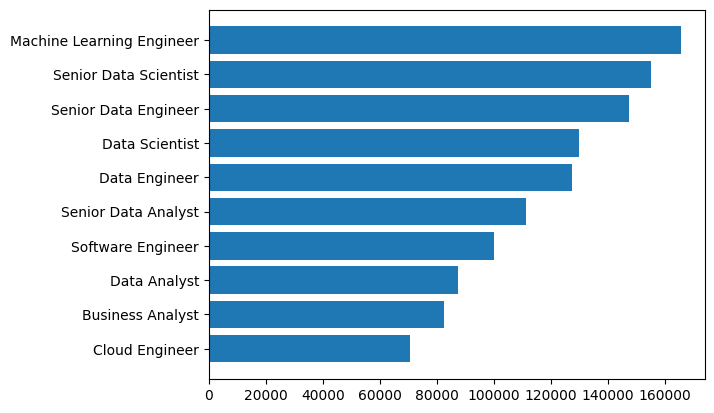

In [365]:
plt.barh(sudan_jobs_salary_scale.index,sudan_jobs_salary_scale['median'].sort_values(ascending=True))

<BarContainer object of 10 artists>

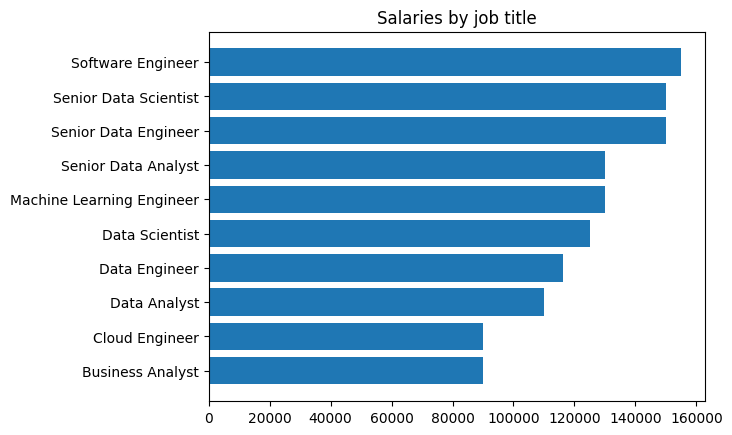

In [366]:
us_jobs = dataframe[dataframe['job_country'] == 'United States']
us_jobs = us_jobs[us_jobs['salary_year_avg'].notna()]
us_jobs_salary_scale = us_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count'])
plt.title('Salaries by job title')
plt.barh(us_jobs_salary_scale.index,us_jobs_salary_scale['median'].sort_values(ascending=True))


<BarContainer object of 10 artists>

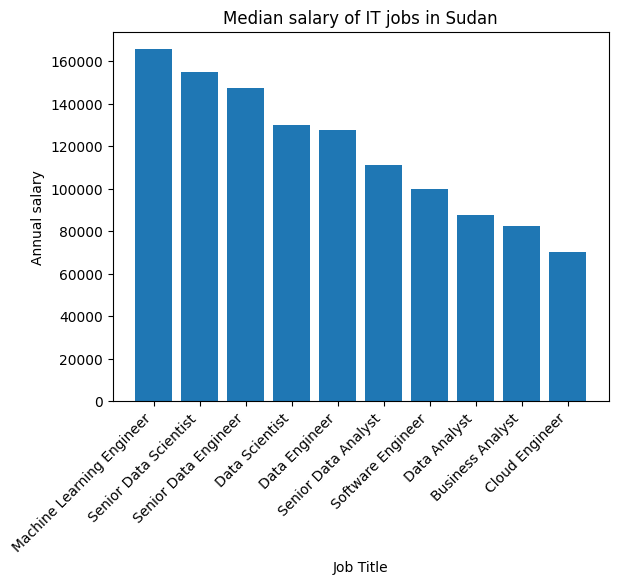

In [367]:
plt.title('Median salary of IT jobs in Sudan')
plt.xlabel('Job Title')
plt.ylabel('Annual salary')
plt.xticks(rotation=45,ha='right')
plt.bar(sudan_jobs_salary_scale['median'].sort_values(ascending=False).index,sudan_jobs_salary_scale['median'].sort_values(ascending=False))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Machine Learning Engineer'),
  Text(1, 0, 'Senior Data Scientist'),
  Text(2, 0, 'Senior Data Engineer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Senior Data Analyst'),
  Text(6, 0, 'Software Engineer'),
  Text(7, 0, 'Data Analyst'),
  Text(8, 0, 'Business Analyst'),
  Text(9, 0, 'Cloud Engineer')])

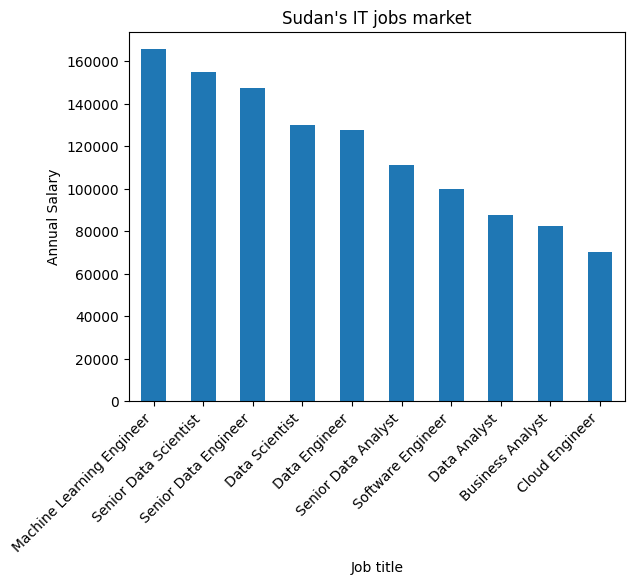

In [368]:
sudan_median_salaries = sudan_jobs_salary_scale['median'].sort_values(ascending=False)
sudan_median_salaries.plot(kind='bar',title="Sudan's IT jobs market",xlabel='Job title',ylabel='Annual Salary')
plt.xticks(rotation=45,ha='right')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Machine Learning Engineer'),
  Text(1, 0, 'Senior Data Scientist'),
  Text(2, 0, 'Senior Data Engineer'),
  Text(3, 0, 'Data Scientist'),
  Text(4, 0, 'Data Engineer'),
  Text(5, 0, 'Senior Data Analyst'),
  Text(6, 0, 'Software Engineer'),
  Text(7, 0, 'Data Analyst'),
  Text(8, 0, 'Business Analyst'),
  Text(9, 0, 'Cloud Engineer')])

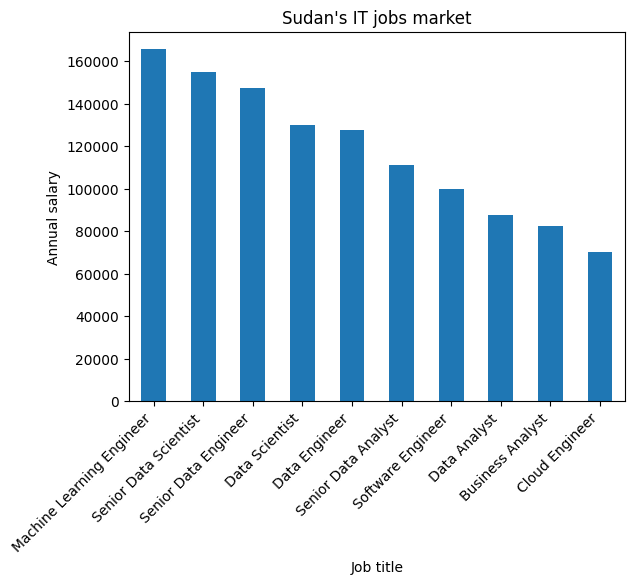

In [369]:
sudan_median_salaries = sudan_jobs_salary_scale['median'].sort_values(ascending=False)
sudan_median_salaries.plot(x=sudan_median_salaries.index,y=sudan_median_salaries,kind='bar')
plt.title("Sudan's IT jobs market")
plt.xlabel('Job title')
plt.ylabel('Annual salary')
plt.xticks(rotation=45,ha='right')

Text(0.5, 1.0, 'Median Salary by job title')

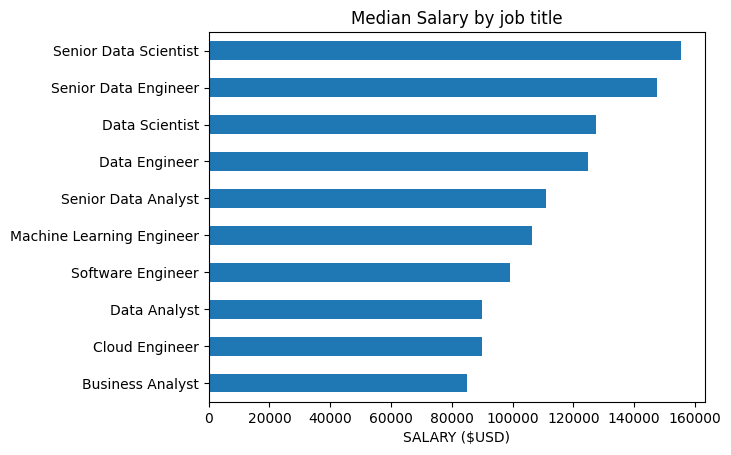

In [370]:
median_salary = dataframe.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=True)
median_salary.plot(kind='barh')
plt.xlabel('SALARY ($USD)')
plt.ylabel('')
plt.title('Median Salary by job title')

<Axes: ylabel='job_title_short'>

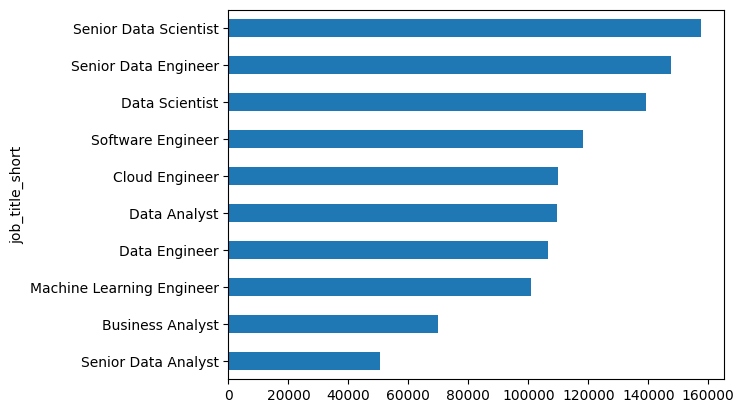

In [371]:
autralia_jobs = dataframe[dataframe['job_country'] == 'Australia']
autralia_jobs_salary = autralia_jobs.dropna(subset='salary_year_avg')
autralia_jobs_salary = autralia_jobs_salary.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count'])
australia_median_salaries = autralia_jobs_salary['median'].sort_values(ascending=True)
australia_median_salaries.plot(kind='barh')



<Axes: ylabel='job_title_short'>

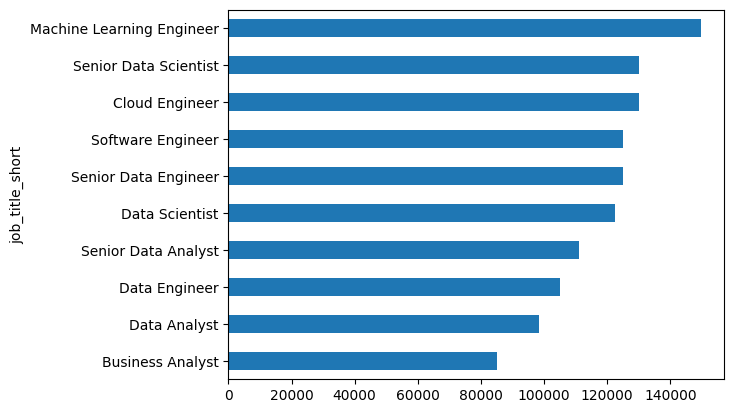

In [372]:
canada_salaries = dataframe[dataframe['job_country'] == 'Canada']
canada_salaries = canada_salaries.dropna(subset='salary_year_avg')
canada_salaries_scale = canada_salaries.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count'])
canada_median_salaries = canada_salaries_scale['median'].sort_values(ascending=True)
canada_median_salaries.plot(kind='barh')

Text(0, 0.5, 'Annual Salary')

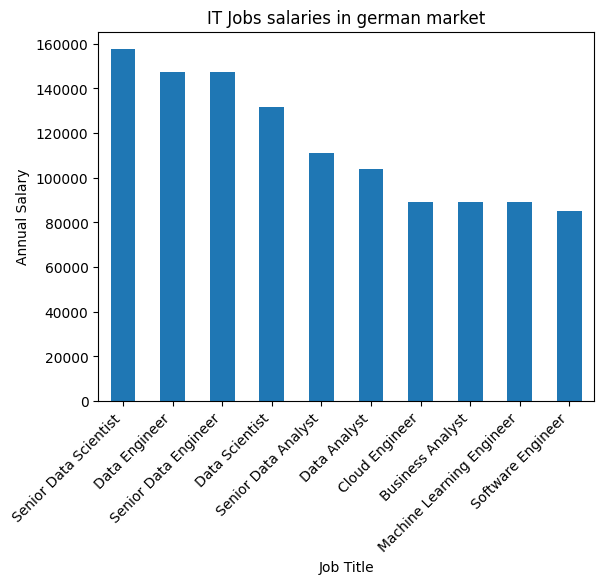

In [373]:
germany_jobs = dataframe[dataframe['job_country'] == 'Germany']
germany_jobs = germany_jobs.dropna(subset='salary_year_avg')
germany_median_salaries = germany_jobs.groupby('job_title_short')['salary_year_avg'].agg(['min','max','median','count'])
germany_median_salaries = germany_median_salaries['median'].sort_values(ascending=False)
germany_median_salaries.plot(kind='bar')
plt.title('IT Jobs salaries in german market')
plt.xlabel('Job Title')
plt.xticks(rotation = 45,ha = 'right')
plt.ylabel('Annual Salary')

In [374]:
salaries = dataframe
median_salary = dataframe['salary_year_avg'].median()
salaries = salaries.drop_duplicates(subset=['job_location','job_title_short'])
salaries

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785728,Senior Data Scientist,"Senior Data Scientist, Operations Research",Jerman,melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Wolt Oy,"['python', 'sql']","{'programming': ['python', 'sql']}",2023
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"['nosql', 'mongodb', 'mongodb', 'python', 'ela...","{'analyst_tools': ['excel'], 'cloud': ['aws', ...",2023
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"['python', 'c#', 'java', 'scala', 'sql', 'post...","{'cloud': ['azure', 'databricks'], 'databases'...",2023
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023


In [375]:
dataframe.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [376]:
dataframe.pivot_table(values='salary_year_avg',index='job_country',columns='job_title_short',aggfunc='median')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Albania,NaN,NaN,49950.00,NaN,69981.25,NaN,NaN,NaN,157500.0,NaN
Algeria,NaN,NaN,44100.00,45000.0,NaN,NaN,NaN,NaN,NaN,NaN
Argentina,71100.0,197500.0,92771.75,96773.0,71000.00,101029.0,NaN,147500.0,NaN,174500.0
Armenia,NaN,NaN,100500.00,48750.0,NaN,87021.0,NaN,NaN,NaN,NaN
Australia,70000.0,110000.0,109500.00,106712.5,139216.00,101029.0,50640.0,147500.0,157500.0,118350.0
...,...,...,...,...,...,...,...,...,...,...
Uruguay,NaN,NaN,100500.00,NaN,NaN,50000.0,NaN,NaN,57500.0,NaN
Uzbekistan,NaN,NaN,NaN,NaN,30750.00,NaN,NaN,NaN,NaN,NaN
Vietnam,79200.0,NaN,75550.00,96773.0,70000.00,57600.0,105837.5,147500.0,79200.0,53600.0


In [377]:
top_countries = dataframe['job_country'].value_counts().head(5).index
top_countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany'], dtype='object', name='job_country')

In [378]:
df_top_countries = dataframe.pivot_table(
    index = 'job_country',
    values = 'salary_year_avg',
    columns= 'job_title_short',
    aggfunc= 'median')

df_top_countries = df_top_countries.loc[top_countries]
df_top_countries

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0


<Axes: xlabel='job_country'>

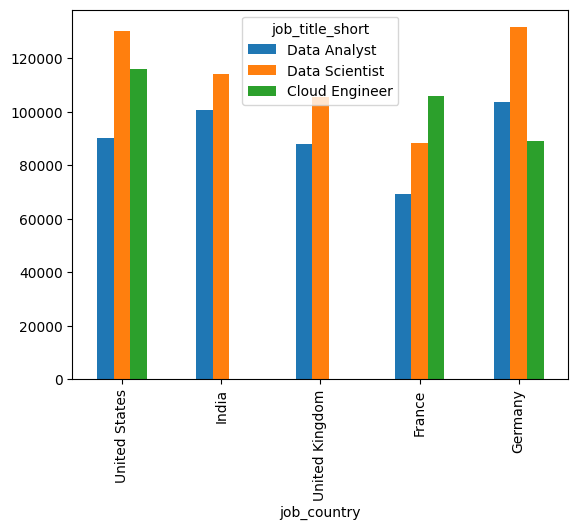

In [379]:
top_jobs = ['Data Analyst','Data Scientist','Cloud Engineer']
df_top_countries = df_top_countries[top_jobs]
df_top_countries.plot(kind='bar')

In [380]:
gulf_countries = ['Saudi Arabia', 'United Arab Emirates', 'Qatar', 'Kuwait', 'Oman', 'Bahrain']
job_counts = dataframe['job_country'].value_counts()
job_counts_gulf = job_counts[job_counts.index.intersection(gulf_countries)]
gulf_jobs_count = job_counts_gulf.sort_index(ascending=False)
gulf_jobs = dataframe.pivot_table(index='job_country',values='salary_year_avg',columns='job_title_short',aggfunc='median')

<Axes: xlabel='job_title_short'>

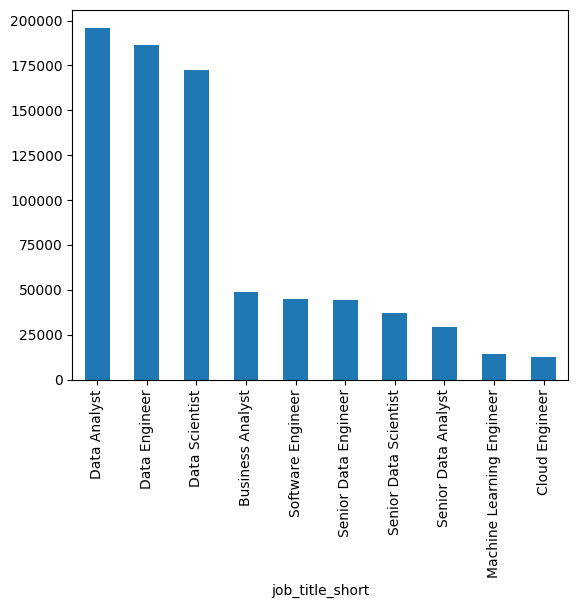

In [381]:
df_top_10 = dataframe.groupby('job_title_short').size().sort_values(ascending=False)
df_top_10.plot(kind='bar')

In [382]:
top_ten = dataframe.groupby('job_country').size().sort_values(ascending=False).head(10)
top_ten = top_ten.index
top_ten

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain', 'Singapore', 'Sudan', 'Netherlands', 'Italy'],
      dtype='object', name='job_country')

<Axes: xlabel='job_country'>

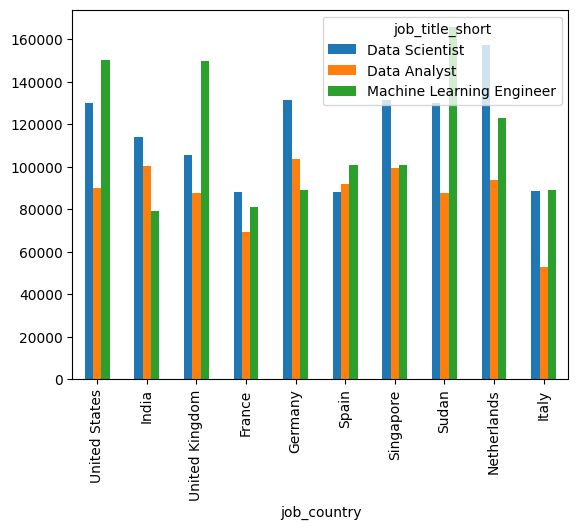

In [383]:
top_ten_sals = dataframe.dropna(subset='salary_year_avg')

top_ten_sals = top_ten_sals.pivot_table(index='job_country',columns='job_title_short',values='salary_year_avg',aggfunc='median')

top_ten_sals = top_ten_sals.loc[top_ten]
top_three_jobs = ['Data Scientist','Data Analyst','Machine Learning Engineer']
top_ten_sals[top_three_jobs].plot(kind='bar')


In [384]:
dataframe.groupby('job_title_short')['salary_year_avg'].agg('median').sort_values(ascending=False)

job_title_short
Senior Data Scientist        155500.0
Senior Data Engineer         147500.0
Data Scientist               127500.0
Data Engineer                125000.0
Senior Data Analyst          111175.0
Machine Learning Engineer    106415.0
Software Engineer             99150.0
Cloud Engineer                90000.0
Data Analyst                  90000.0
Business Analyst              85000.0
Name: salary_year_avg, dtype: float64

<Axes: xlabel='job_title_short'>

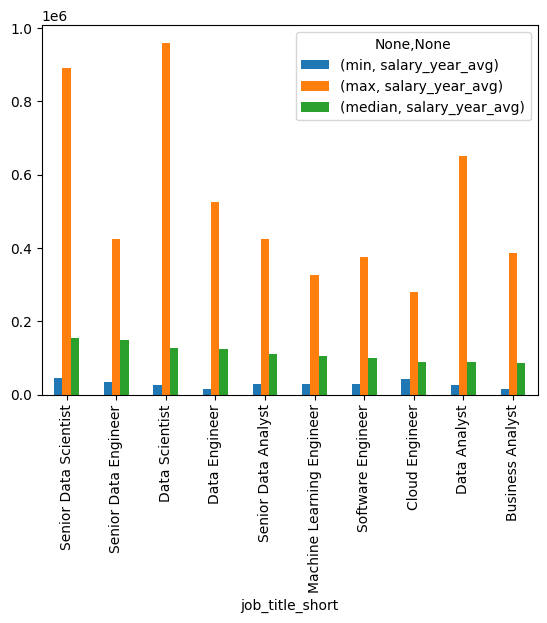

In [385]:
dataframe.pivot_table(index='job_title_short',values='salary_year_avg',aggfunc=['min','max','median']).sort_values(by=('median','salary_year_avg'),ascending=False).plot(kind='bar')

In [386]:
df_sudan = dataframe[dataframe['job_country'] == 'Sudan'].copy()
df_sudan['job_posted_month'] = df_sudan['job_posted_date'].dt.strftime('%B')
df_sudan_pivot = df_sudan.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size').copy()
df_sudan_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
April,105,12,142,472,842,9,31,118,183,43
August,70,13,133,578,840,18,34,191,248,23
December,55,7,143,459,431,22,21,115,90,21
February,91,5,187,519,819,11,56,141,147,23
January,116,7,308,493,926,17,90,137,212,42
July,36,3,78,518,590,9,16,152,153,10
June,46,5,81,589,686,9,18,175,140,13
March,71,6,180,562,752,11,43,151,176,24
May,22,3,83,543,750,7,20,168,136,17


In [387]:
df_sudan_pivot.reset_index(inplace=True)
df_sudan_pivot['month_no'] = pd.to_datetime(df_sudan_pivot['job_posted_month'], format = '%B').dt.month


In [388]:
df_sudan_pivot.sort_values(by='month_no',inplace=True)

In [389]:
df_sudan_pivot.set_index('job_posted_month')

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
job_posted_month,,,,,,,,,,,
January,116,7,308,493,926,17,90,137,212,42,1
February,91,5,187,519,819,11,56,141,147,23,2
March,71,6,180,562,752,11,43,151,176,24,3
April,105,12,142,472,842,9,31,118,183,43,4
May,22,3,83,543,750,7,20,168,136,17,5
June,46,5,81,589,686,9,18,175,140,13,6
July,36,3,78,518,590,9,16,152,153,10,7
August,70,13,133,578,840,18,34,191,248,23,8
September,41,8,144,500,693,14,30,122,119,18,9


In [390]:
df_sudan_pivot.drop('month_no',axis=1,inplace=True)

Text(0.5, 1.0, 'IT Job opening per month')

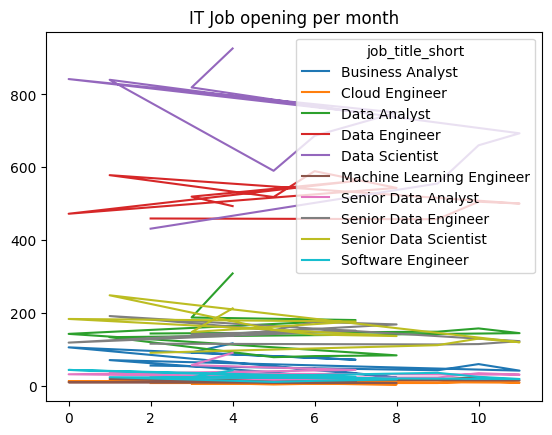

In [391]:
df_sudan_pivot.plot(kind='line',legend=True)
plt.title('IT Job opening per month')

In [392]:
top_3 = df_sudan['job_title_short'].value_counts().head(3)

In [393]:
top_3 = top_3.index.tolist()

<Axes: >

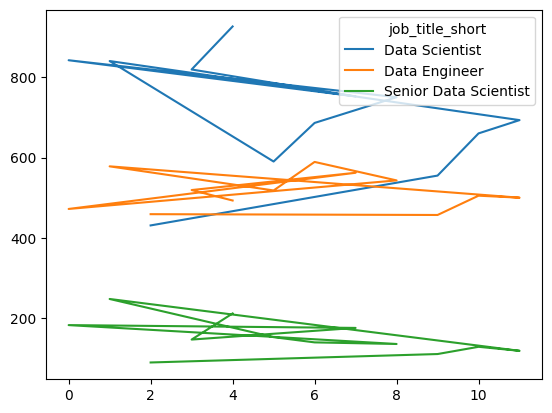

In [394]:
df_sudan_pivot[top_3].plot(kind='line')

In [395]:
df_sudan_software_pivot = pd.read_csv('https://lukeb.co/software_csv',index_col = 'job_posted_month')
df_sudan_software_pivot

,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,
January,13619,9827,5108,4348
February,11456,9116,7298,4284
March,11102,8178,5814,4159
April,14037,9209,7232,4220
May,12126,8864,6718,4980
June,12003,8065,5902,4781
July,11914,8061,6839,4344
August,11571,8191,7413,4104
September,14016,8447,6139,4094


In [396]:
df_sudan_pivot

job_title_short,job_posted_month,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
4,January,116,7,308,493,926,17,90,137,212,42
3,February,91,5,187,519,819,11,56,141,147,23
7,March,71,6,180,562,752,11,43,151,176,24
0,April,105,12,142,472,842,9,31,118,183,43
8,May,22,3,83,543,750,7,20,168,136,17
6,June,46,5,81,589,686,9,18,175,140,13
5,July,36,3,78,518,590,9,16,152,153,10
1,August,70,13,133,578,840,18,34,191,248,23
11,September,41,8,144,500,693,14,30,122,119,18
10,October,59,12,157,505,660,23,34,114,129,24


In [397]:
df_sudan_pivot.set_index('job_posted_month',inplace=True)

In [398]:
df_sudan_merged = df_sudan_pivot.merge(df_sudan_software_pivot,on='job_posted_month')

In [399]:
df_sudan_merged

,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,Front-End Developer,Back-End Developer,Full-Stack Developer,UI/UX Designer
job_posted_month,,,,,,,,,,,,,,
January,116,7,308,493,926,17,90,137,212,42,13619,9827,5108,4348
February,91,5,187,519,819,11,56,141,147,23,11456,9116,7298,4284
March,71,6,180,562,752,11,43,151,176,24,11102,8178,5814,4159
April,105,12,142,472,842,9,31,118,183,43,14037,9209,7232,4220
May,22,3,83,543,750,7,20,168,136,17,12126,8864,6718,4980
June,46,5,81,589,686,9,18,175,140,13,12003,8065,5902,4781
July,36,3,78,518,590,9,16,152,153,10,11914,8061,6839,4344
August,70,13,133,578,840,18,34,191,248,23,11571,8191,7413,4104
September,41,8,144,500,693,14,30,122,119,18,14016,8447,6139,4094


In [400]:
sudan_top_5 = df_sudan_merged.sum().sort_values(ascending=False).head(5).index.tolist()
sudan_top_5

['Front-End Developer',
 'Back-End Developer',
 'Full-Stack Developer',
 'UI/UX Designer',
 'Data Scientist']

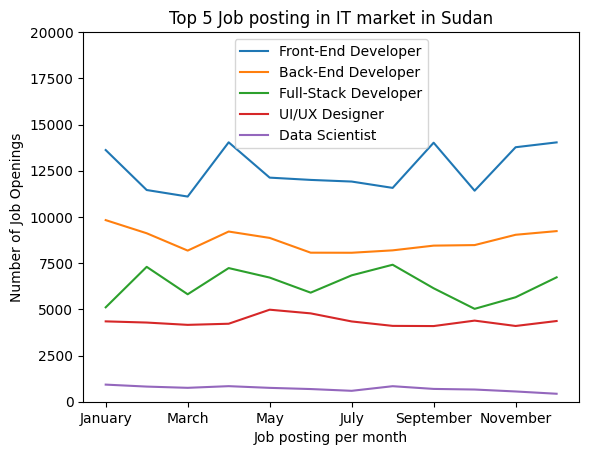

In [401]:
df_sudan_merged[sudan_top_5].plot(kind='line')
plt.title('Top 5 Job posting in IT market in Sudan')
plt.xlabel('Job posting per month')
plt.ylabel('Number of Job Openings')
plt.ylim(0,20000)
plt.show()

In [402]:
dataframe['job_posted_month'] = dataframe['job_posted_date'].dt.strftime('%b')
dataframe

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023,Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023,Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023,Aug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023,Mar
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023,Mar
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [403]:
months = dataframe['job_posted_month'].unique()
months

array(['Jun', 'Jan', 'Oct', 'Jul', 'Aug', 'Nov', 'Mar', 'Dec', 'Apr',
       'Feb', 'Sep', 'May'], dtype=object)

In [404]:
dict_months = {month: dataframe[dataframe['job_posted_month'] == month] for month in months}

In [405]:
dict_months

{'Jun':                   job_title_short  \
 0            Senior Data Engineer   
 8                Business Analyst   
 16                  Data Engineer   
 17                 Data Scientist   
 24                 Data Scientist   
 ...                           ...   
 785347             Data Scientist   
 785571               Data Analyst   
 785617               Data Analyst   
 785669  Machine Learning Engineer   
 785675               Data Analyst   
 
                                                 job_title  \
 0       Senior Clinical Data Engineer / Principal Clin...   
 8                Technology & Operations Business Analyst   
 16                                      Big Data Engineer   
 17                                 Data Science Team Lead   
 24                          Data Scientist (DataLab Team)   
 ...                                                   ...   
 785347                    Practicante Científico de Datos   
 785571  Credits Monitoring and Reporti

In [406]:
first_quarter_job_opening = pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)
second_quarter_job_opening = pd.concat([dict_months['Apr'],dict_months['May'],dict_months['Jun']],ignore_index=True)
third_quarter_job_opening = pd.concat([dict_months['Jul'],dict_months['Aug'],dict_months['Sep']],ignore_index=True)
forth_quarter_job_opening = pd.concat([dict_months['Oct'],dict_months['Nov'],dict_months['Dec']],ignore_index=True)

In [407]:
first_quarter_job_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220484 entries, 0 to 220483
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        220484 non-null  object        
 1   job_title              220484 non-null  object        
 2   job_location           220207 non-null  object        
 3   job_via                220483 non-null  object        
 4   job_schedule_type      216776 non-null  object        
 5   job_work_from_home     220484 non-null  bool          
 6   search_location        220484 non-null  object        
 7   job_posted_date        220484 non-null  datetime64[ns]
 8   job_no_degree_mention  220484 non-null  bool          
 9   job_health_insurance   220484 non-null  bool          
 10  job_country            220479 non-null  object        
 11  salary_rate            8667 non-null    object        
 12  salary_year_avg        6510 non-null    floa

In [408]:
second_quarter_job_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176595 entries, 0 to 176594
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        176595 non-null  object        
 1   job_title              176595 non-null  object        
 2   job_location           176369 non-null  object        
 3   job_via                176594 non-null  object        
 4   job_schedule_type      173306 non-null  object        
 5   job_work_from_home     176595 non-null  bool          
 6   search_location        176595 non-null  object        
 7   job_posted_date        176595 non-null  datetime64[ns]
 8   job_no_degree_mention  176595 non-null  bool          
 9   job_health_insurance   176595 non-null  bool          
 10  job_country            176576 non-null  object        
 11  salary_rate            8552 non-null    object        
 12  salary_year_avg        6118 non-null    floa

In [409]:
third_quarter_job_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201298 entries, 0 to 201297
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        201298 non-null  object        
 1   job_title              201298 non-null  object        
 2   job_location           201061 non-null  object        
 3   job_via                201292 non-null  object        
 4   job_schedule_type      197867 non-null  object        
 5   job_work_from_home     201298 non-null  bool          
 6   search_location        201298 non-null  object        
 7   job_posted_date        201298 non-null  datetime64[ns]
 8   job_no_degree_mention  201298 non-null  bool          
 9   job_health_insurance   201298 non-null  bool          
 10  job_country            201292 non-null  object        
 11  salary_rate            9142 non-null    object        
 12  salary_year_avg        5560 non-null    floa

In [410]:
forth_quarter_job_opening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187364 entries, 0 to 187363
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        187364 non-null  object        
 1   job_title              187363 non-null  object        
 2   job_location           187059 non-null  object        
 3   job_via                187364 non-null  object        
 4   job_schedule_type      185125 non-null  object        
 5   job_work_from_home     187364 non-null  bool          
 6   search_location        187364 non-null  object        
 7   job_posted_date        187364 non-null  datetime64[ns]
 8   job_no_degree_mention  187364 non-null  bool          
 9   job_health_insurance   187364 non-null  bool          
 10  job_country            187345 non-null  object        
 11  salary_rate            6706 non-null    object        
 12  salary_year_avg        3815 non-null    floa

In [411]:
first_quarter_job_opening

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023,Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023,Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023,Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023,Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023,Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023,Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [412]:
first_quarter_job_opening = first_quarter_job_opening.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
second_quarter_job_opening = second_quarter_job_opening.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
third_quarter_job_opening = third_quarter_job_opening.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')
forth_quarter_job_opening = forth_quarter_job_opening.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [413]:
first_quarter_job_opening['month_no'] = pd.to_datetime(first_quarter_job_opening.index,format='%b').month
first_quarter_job_opening = first_quarter_job_opening.sort_values(by='month_no',ascending=True)
second_quarter_job_opening['month_no'] = pd.to_datetime(second_quarter_job_opening.index,format='%b').month
second_quarter_job_opening = second_quarter_job_opening.sort_values(by='month_no',ascending=True)
third_quarter_job_opening['month_no'] = pd.to_datetime(third_quarter_job_opening.index,format='%b').month
third_quarter_job_opening = third_quarter_job_opening.sort_values(by='month_no',ascending=True)
forth_quarter_job_opening['month_no'] = pd.to_datetime(forth_quarter_job_opening.index,format='%b').month
forth_quarter_job_opening = forth_quarter_job_opening.sort_values(by='month_no',ascending=True)
first_quarter_job_opening.drop('month_no',inplace=True,axis=1)
second_quarter_job_opening.drop('month_no',inplace=True,axis=1)
third_quarter_job_opening.drop('month_no',inplace=True,axis=1)
forth_quarter_job_opening.drop('month_no',inplace=True,axis=1)

In [414]:
second_quarter_job_opening.sum()

job_title_short
Business Analyst             10067
Cloud Engineer                2245
Data Analyst                 44945
Data Engineer                44038
Data Scientist               38873
Machine Learning Engineer     2849
Senior Data Analyst           6595
Senior Data Engineer         10679
Senior Data Scientist         8097
Software Engineer             8207
dtype: int64

In [415]:
third_quarter_job_opening.sum()

job_title_short
Business Analyst             13486
Cloud Engineer                3459
Data Analyst                 49692
Data Engineer                45058
Data Scientist               44738
Machine Learning Engineer     3784
Senior Data Analyst           7525
Senior Data Engineer         11316
Senior Data Scientist        10108
Software Engineer            12132
dtype: int64

In [416]:
forth_quarter_job_opening.sum()

job_title_short
Business Analyst             13789
Cloud Engineer                3606
Data Analyst                 45052
Data Engineer                43734
Data Scientist               40395
Machine Learning Engineer     3950
Senior Data Analyst           6233
Senior Data Engineer         10066
Senior Data Scientist         8127
Software Engineer            12412
dtype: int64

In [417]:
all_quarters = pd.concat([first_quarter_job_opening,second_quarter_job_opening,third_quarter_job_opening,forth_quarter_job_opening],ignore_index=True)

In [418]:
all_quarters.reset_index()

job_title_short,index,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
0,0,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
1,1,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
2,2,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
3,3,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
4,4,2408,480,13423,13646,11745,811,1925,3298,2399,1969
5,5,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
6,6,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
7,7,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
8,8,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499
9,9,5000,1186,16239,15484,14151,1391,2317,3591,2908,4344


In [419]:
month_map = {
    "Jan": 0, "Feb": 1, "Mar": 2, "Apr": 3, "May": 4, "Jun": 5,
    "Jul": 6, "Aug": 7, "Sep": 8, "Oct": 9, "Nov": 10, "Dec": 11
}

In [420]:
all_quarters.index = month_map

In [421]:
all_quarters

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
Jan,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
Feb,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
Mar,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
Apr,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
Jun,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
Jul,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
Aug,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
Sep,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499
Oct,5000,1186,16239,15484,14151,1391,2317,3591,2908,4344


In [422]:
all_quarters['month_no'] = all_quarters.index.map(month_map)

In [423]:
all_quarters

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer,month_no
Jan,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122,0
Feb,3454,843,16558,15899,13951,1046,2713,3756,2994,3364,1
Mar,3393,883,16243,16093,13569,1065,2454,3705,2987,3692,2
Apr,4246,1051,15514,14891,13513,990,2351,3572,2766,4025,3
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969,4
Jun,3413,714,16008,15501,13615,1048,2319,3809,2932,2213,5
Jul,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663,6
Aug,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970,7
Sep,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499,8
Oct,5000,1186,16239,15484,14151,1391,2317,3591,2908,4344,9


In [424]:
all_quarters = all_quarters.sort_values('month_no')

In [425]:
all_quarters.drop('month_no',axis=1,inplace=True)

<Axes: >

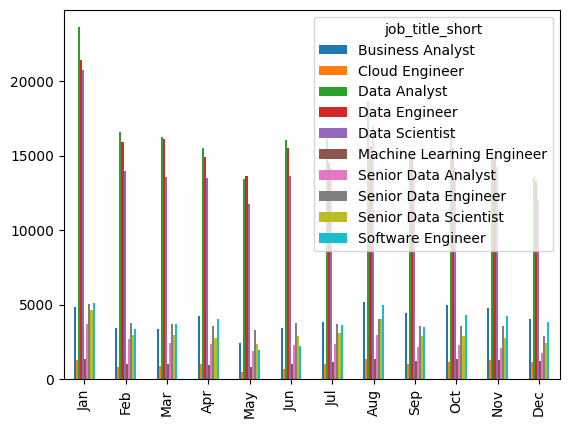

In [426]:
all_quarters.plot(kind='bar')


In [427]:
all_quarters_top_3_jobs = all_quarters.sum().sort_values(ascending=False).head(3).index.tolist()

<Axes: >

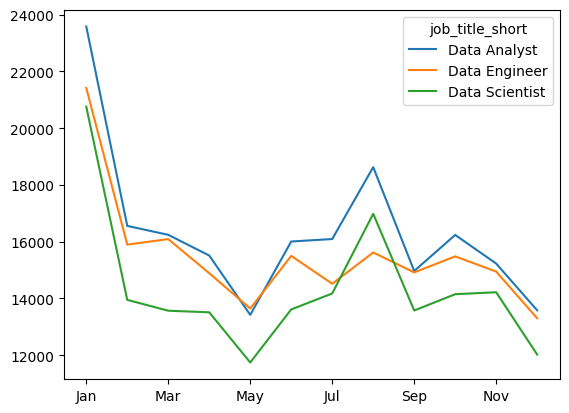

In [428]:
all_quarters[all_quarters_top_3_jobs].plot(kind='line')

<Axes: >

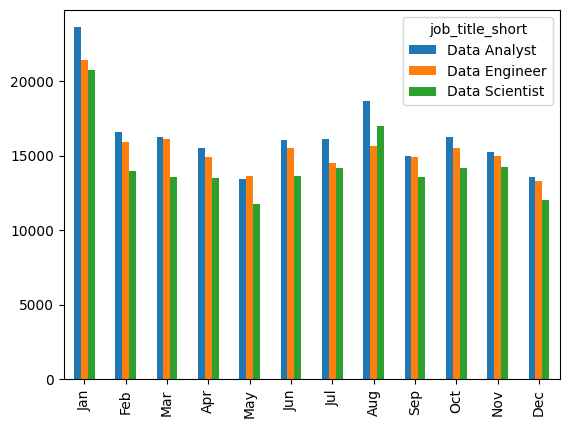

In [429]:
all_quarters[all_quarters_top_3_jobs].plot(kind='bar')

In [430]:
all_quarters_top_1_jobs = all_quarters.sum().sort_values(ascending=False).head(1).index.tolist()

Text(0.5, 0, 'Month of the year')

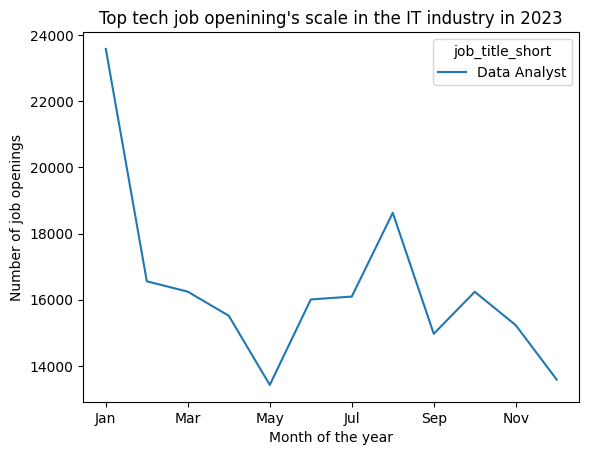

In [431]:
all_quarters[all_quarters_top_1_jobs].plot(kind='line')
plt.title("Top tech job openining's scale in the IT industry in 2023")
plt.ylabel('Number of job openings')
plt.xlabel('Month of the year')

In [432]:
dataframe.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],...",2023,Oct
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',...",2023,Jul
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl...",2023,Aug


In [433]:
all_quarters

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
Jan,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
Feb,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
Mar,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
Apr,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
Jun,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
Jul,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
Aug,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
Sep,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499
Oct,5000,1186,16239,15484,14151,1391,2317,3591,2908,4344


In [434]:
ahmedsayed = dataframe.copy()

<Axes: xlabel='month_no'>

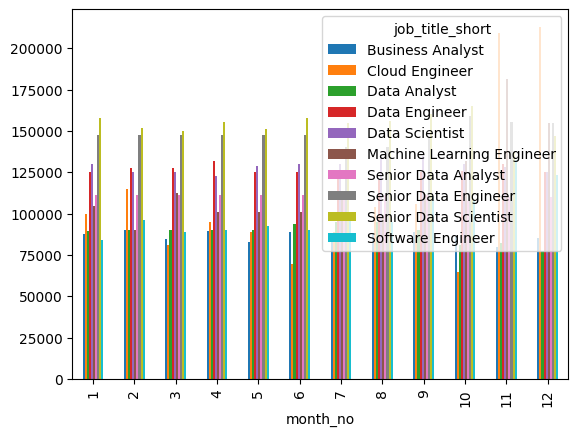

In [435]:
ahmedsayed['month_no'] = ahmedsayed['job_posted_date'].dt.month
ahmedsayed = ahmedsayed.sort_values(by='month_no')
ahmedsayed.dropna(subset='salary_year_avg',inplace=True)
ahmedsayed_pivot = ahmedsayed.pivot_table(index='month_no',columns='job_title_short',values='salary_year_avg',aggfunc='median')
ahmedsayed_pivot.index
ahmedsayed_pivot.plot(kind='bar')

In [436]:
ahmedsayed_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_no,,,,,,,,,,
1,87500.0,99550.0,89565.0,125000.0000,130000.000000,104668.00,111175.00,147500.000000,157500.000000,84150.0
2,90000.0,115000.0,90000.0,127500.0000,125000.000000,90000.00,111175.00,147500.000000,152000.000000,96075.0
3,84500.0,81000.0,90000.0,127647.2500,125000.000000,112500.00,111175.00,147500.000000,150000.000000,89100.0
4,89550.0,95000.0,90000.0,131580.0000,122500.000000,101029.00,111175.00,147500.000000,155489.617188,90000.0
5,82702.5,89100.0,90000.0,125000.0000,128908.000000,101029.00,111175.00,147500.000000,151325.000000,92500.0
6,89100.0,69750.0,93411.0,125000.0000,129750.000000,101029.00,111175.00,147500.000000,157500.000000,90000.0
7,82500.0,89100.0,95000.0,122550.0000,129844.398438,108000.00,111175.00,140000.000000,155000.000000,99150.0
8,87450.0,103962.0,95000.0,120233.1875,134000.000000,99150.00,111175.00,140000.000000,156000.000000,95000.0
9,89100.0,105968.0,90000.0,125000.0000,135000.000000,111707.75,111175.00,146130.796875,160000.000000,110750.0


In [437]:
ahmedsayed_pivot.index = pd.to_datetime(ahmedsayed_pivot.index, format='%m').strftime('%b')

In [438]:
ahmedsayed_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
month_no,,,,,,,,,,
Jan,87500.0,99550.0,89565.0,125000.0000,130000.000000,104668.00,111175.00,147500.000000,157500.000000,84150.0
Feb,90000.0,115000.0,90000.0,127500.0000,125000.000000,90000.00,111175.00,147500.000000,152000.000000,96075.0
Mar,84500.0,81000.0,90000.0,127647.2500,125000.000000,112500.00,111175.00,147500.000000,150000.000000,89100.0
Apr,89550.0,95000.0,90000.0,131580.0000,122500.000000,101029.00,111175.00,147500.000000,155489.617188,90000.0
May,82702.5,89100.0,90000.0,125000.0000,128908.000000,101029.00,111175.00,147500.000000,151325.000000,92500.0
Jun,89100.0,69750.0,93411.0,125000.0000,129750.000000,101029.00,111175.00,147500.000000,157500.000000,90000.0
Jul,82500.0,89100.0,95000.0,122550.0000,129844.398438,108000.00,111175.00,140000.000000,155000.000000,99150.0
Aug,87450.0,103962.0,95000.0,120233.1875,134000.000000,99150.00,111175.00,140000.000000,156000.000000,95000.0
Sep,89100.0,105968.0,90000.0,125000.0000,135000.000000,111707.75,111175.00,146130.796875,160000.000000,110750.0


<Axes: xlabel='month_no'>

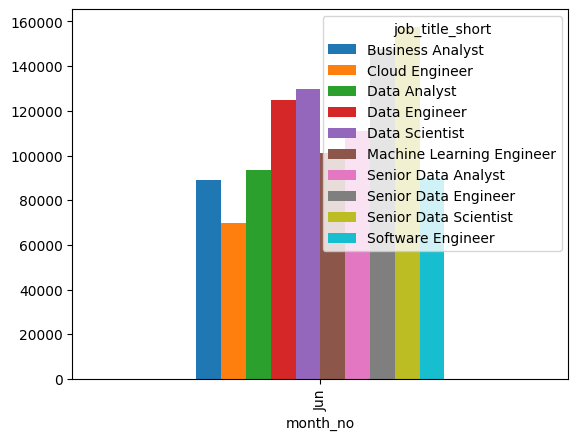

In [439]:
ahmedsayed_pivot[ahmedsayed_pivot.index == 'Jun'].plot(kind='bar')


In [440]:
dataframe['job_skills']

0                                                      None
1         ['r', 'python', 'sql', 'nosql', 'power bi', 't...
2         ['python', 'sql', 'c#', 'azure', 'airflow', 'd...
3         ['python', 'c++', 'java', 'matlab', 'aws', 'te...
4         ['bash', 'python', 'oracle', 'aws', 'ansible',...
                                ...                        
785736    ['bash', 'python', 'perl', 'linux', 'unix', 'k...
785737                       ['sas', 'sas', 'sql', 'excel']
785738                              ['powerpoint', 'excel']
785739    ['python', 'go', 'nosql', 'sql', 'mongo', 'she...
785740                                      ['aws', 'flow']
Name: job_skills, Length: 785741, dtype: object

In [441]:
df_q1 = pd.concat([dict_months['Jan'],dict_months['Feb'],dict_months['Mar']],ignore_index=True)

In [442]:
df_q1.to_csv("first_quarter_jobs.csv")

In [443]:
pd.read_csv('first_quarter_jobs.csv')

,Unnamed: 0,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023,Jan
2,2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023,Jan
3,3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023,Jan
4,4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023,Mar
220480,220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023,Mar
220481,220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023,Mar
220482,220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [444]:
df_q1

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023,Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,None,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023,Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,None,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023,Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,None,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023,Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023,Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023,Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [445]:
pd.read_csv('first_quarter_jobs.csv',index_col=0)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,NaN,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,NaN,NaN,NaN,Devoteam,"['r', 'python', 'sql', 'pandas', 'numpy', 'sci...","{'libraries': ['pandas', 'numpy', 'scikit-lear...",2023,Jan
2,Data Engineer,Data Engineer,"Fort Worth, TX",via LinkedIn,Full-time,False,"Texas, United States",2023-01-25 13:24:01,False,False,United States,NaN,NaN,NaN,Programmers.io,"['sql', 'python']","{'programming': ['sql', 'python']}",2023,Jan
3,Data Engineer,Data Engineer,"San Mateo, CA",via LinkedIn,Full-time,False,"California, United States",2023-01-28 13:07:30,False,True,United States,NaN,NaN,NaN,Verkada,"['sql', 'python', 'aws', 'looker']","{'analyst_tools': ['looker'], 'cloud': ['aws']...",2023,Jan
4,Data Scientist,Data Scientist,"São Paulo, State of São Paulo, Brazil",via BeBee,Full-time,False,Brazil,2023-01-03 23:02:27,False,False,Brazil,NaN,NaN,NaN,Mars,"['python', 'sql', 'azure']","{'cloud': ['azure'], 'programming': ['python',...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220479,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,NaN,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete...",2023,Mar
220480,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,NaN,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi...",2023,Mar
220481,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,NaN,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}",2023,Mar
220482,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,NaN,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [446]:
type(dataframe['job_skills'])

pandas.core.series.Series

In [447]:
ahmedsayed['salary_increase'] = ahmedsayed['salary_year_avg'] * 1.03

In [448]:
ahmedsayed.drop('salary_increase',axis=1,inplace=True)

In [449]:
def salary_increase(salary):
    return salary * 1.03

In [450]:
ahmedsayed['salary_increase'] = ahmedsayed['salary_year_avg'].apply(salary_increase)

In [451]:
ahmedsayed[['salary_year_avg','salary_increase']].dropna()

,salary_year_avg,salary_increase
335447,65000.0,66950.0
785641,150000.0,154500.0
156398,90000.0,92700.0
785563,136400.0,140492.0
575522,115000.0,118450.0
...,...,...
527097,123000.0,126690.0
785395,64800.0,66744.0
139434,156000.0,160680.0
665161,170000.0,175100.0


In [452]:
ahmedsayed['salary_year_avg'].fillna(ahmedsayed['salary_year_avg'].median(),inplace=True)

/tmp/ipykernel_4972/2713591324.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ahmedsayed['salary_year_avg'].fillna(ahmedsayed['salary_year_avg'].median(),inplace=True)


In [453]:
ahmedsayed['salary_increase'].fillna(ahmedsayed['salary_year_avg'].median(),inplace=True)

/tmp/ipykernel_4972/1310187983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ahmedsayed['salary_increase'].fillna(ahmedsayed['salary_year_avg'].median(),inplace=True)


In [454]:
ahmedsayed[['salary_year_avg','salary_increase']]

,salary_year_avg,salary_increase
335447,65000.0,66950.0
785641,150000.0,154500.0
156398,90000.0,92700.0
785563,136400.0,140492.0
575522,115000.0,118450.0
...,...,...
527097,123000.0,126690.0
785395,64800.0,66744.0
139434,156000.0,160680.0
665161,170000.0,175100.0


In [455]:
ahmedsayed = dataframe.copy()

In [456]:
ahmedsayed['salary_increase'] = ahmedsayed['salary_year_avg'].apply(lambda salary: salary * 1.03)

<Axes: >

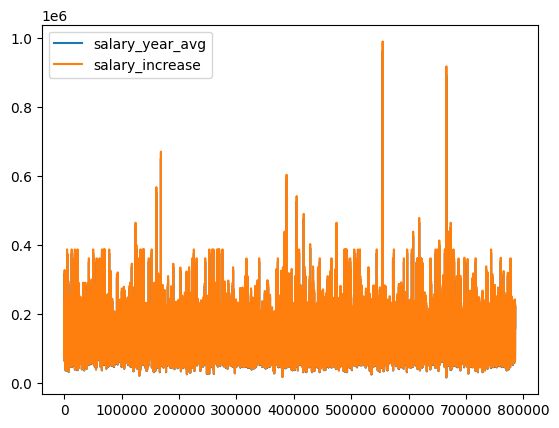

In [457]:
ahmedsayed[['salary_year_avg','salary_increase']].dropna(subset='salary_year_avg').plot(kind='line')

In [458]:
ahmedsayed[['job_title_short','salary_year_avg','salary_increase']].dropna().sort_values(by='salary_year_avg')

,job_title_short,salary_year_avg,salary_increase
665729,Data Engineer,15000.0,15450.00
380187,Business Analyst,16500.0,16995.00
130855,Data Engineer,20000.0,20600.00
535260,Data Engineer,23496.0,24200.88
213687,Data Engineer,24000.0,24720.00
...,...,...,...
160521,Data Scientist,550000.0,566500.00
387378,Data Scientist,585000.0,602550.00
168402,Data Analyst,650000.0,669500.00
665811,Senior Data Scientist,890000.0,916700.00


In [459]:
# ahmedsayed['job_skills'] = ahmedsayed['job_skills'].apply(clean_na)

In [460]:
type(ahmedsayed['job_skills'][1])

str

In [461]:
ahmedsayed['job_skills'] = ahmedsayed['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

In [462]:
type(ahmedsayed['job_skills'][1])

list

In [463]:
ahmedsayed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [464]:
help(ahmedsayed.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset: 'Hashable | Sequence[Hashable] | None' = None, *, keep: 'DropKeep' = 'first', inplace: 'bool' = False, ignore_index: 'bool' = False) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', ``False``}, default 'first'
        Determines which duplicates (if any) to keep.
    
        - 'first' : Drop duplicates except for the first occurrence.
        - 'last' : Drop duplicates except for the last occurrence.
        - ``False`` : Drop all duplicates.
    
    inplace : bool, default ``False``
        Whether to modif

In [465]:
def projected_salary(row):
    if "Senior" in row['job_title_short']:
        return row['salary_year_avg'] * 1.05
    else:
        return row['salary_year_avg'] * 1.03

In [466]:
ahmedsayed['salary_year_avg'].dropna(inplace=True)

In [467]:
ahmedsayed['inflated_salary'] = ahmedsayed.apply(projected_salary,axis=1)

In [468]:
ahmedsayed[['job_title_short','salary_year_avg','inflated_salary']].dropna(subset='salary_year_avg').reset_index().to_excel('salary inflation.xlsx')

In [469]:
skills = ahmedsayed[['job_title_short','salary_year_avg','job_skills']].dropna(subset=['salary_year_avg','job_skills'])

<Axes: xlabel='job_skills'>

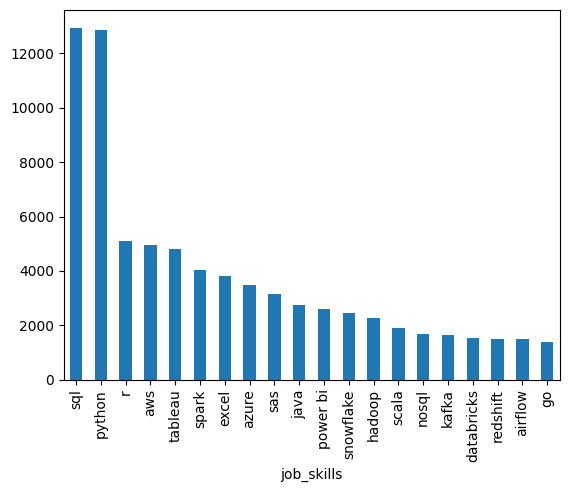

In [470]:
skills.explode('job_skills').value_counts(subset='job_skills').head(20).plot(kind='bar')

In [471]:
skills = skills.explode('job_skills')

In [472]:
devops_skills = skills[skills['job_skills'].isin(['kubernetes','mongodb','jenkins','aws','azure','terraform','shell','docker','github'])]

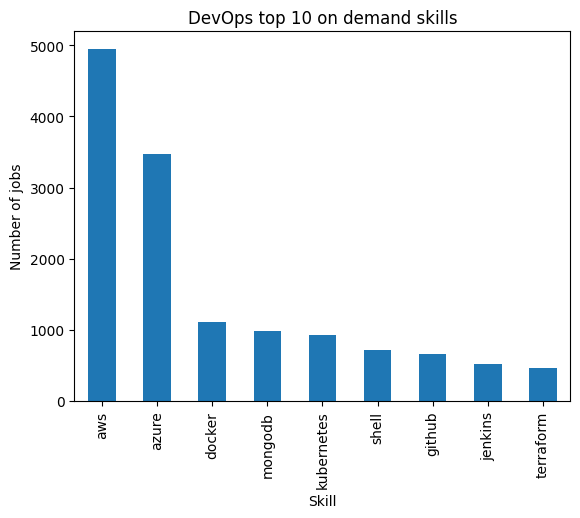

In [473]:
devops_skills.value_counts('job_skills').plot(kind='bar')
plt.title('DevOps top 10 on demand skills')
plt.ylabel('Number of jobs')
plt.xlabel('Skill')
plt.show()

In [474]:
devops_skills_avg_salary = devops_skills.set_index('job_skills').drop('job_title_short',axis=1).pivot_table(index='job_skills',values='salary_year_avg',aggfunc='median').sort_values(by='salary_year_avg',ascending=False)

<Axes: xlabel='job_skills'>

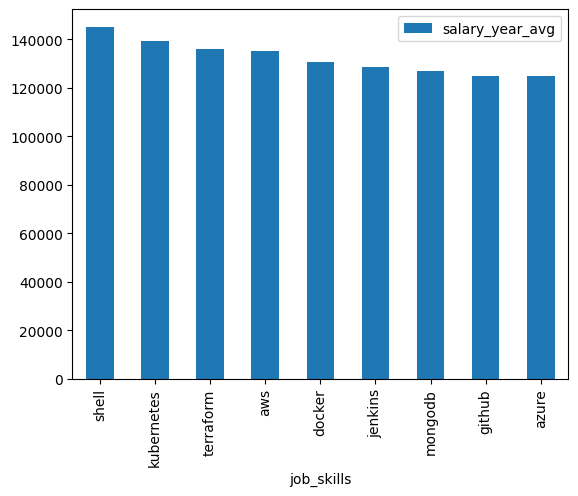

In [475]:
devops_skills_avg_salary.plot(kind='bar')

In [476]:
df_skill_per_job_title = dataframe.copy()

In [477]:
df_skill_per_job_title['job_skills'] = df_skill_per_job_title['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [478]:
df_skill_per_job_title.explode('job_skills')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None,2023,Jun
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}",2023,Mar


In [479]:
df_skill_per_job_title = df_skill_per_job_title.explode('job_skills')

In [480]:
skills_counts = df_skill_per_job_title.groupby(['job_skills','job_title_short']).size()

In [481]:
skills_counts

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [482]:
skill_counts = skills_counts.reset_index(name='skill_count')
skill_counts.sort_values(by='skill_count',ascending=False)

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
293,codecommit,Business Analyst,1
2233,xamarin,Machine Learning Engineer,1
1087,mlr,Machine Learning Engineer,1


In [483]:
dataframe['job_title_short'].unique()

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [484]:
data_engineer_skills = ['Data Engineer','Senior Data Engineer']
data_analyst_skills = ['Data Analyst','Senior Data Analyst']
data_scientist_skills = ['Data Scientist','Senior Data Scientist']
business_analyst_skills = 'Business Analyst'
mahchine_learning_engineer_skills = 'Machine Learning Engineer'
software_engineer_skills = 'Software Engineer'
cloud_engineer_skills = 'Cloud Engineer'

<Axes: xlabel='job_skills'>

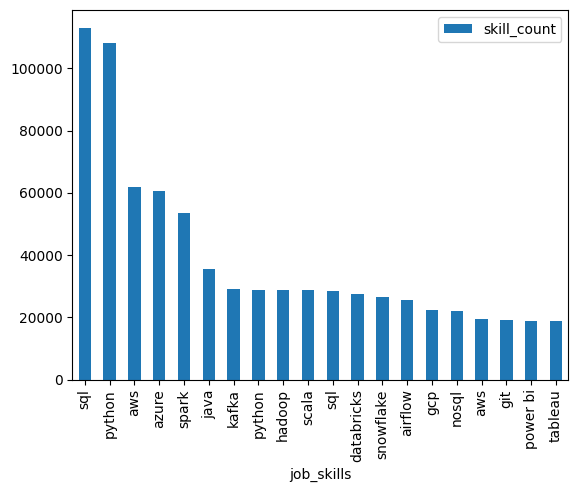

In [485]:
data_engineer_plot = skill_counts[skill_counts['job_title_short'].isin(data_engineer_skills)].set_index('job_skills').drop('job_title_short',axis=1).sort_values(by='skill_count',ascending=False).head(20)
data_engineer_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

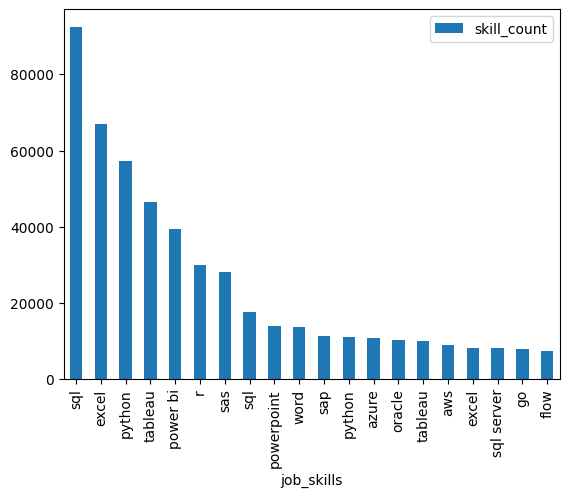

In [486]:
data_analyst_plot = skill_counts[skill_counts['job_title_short'].isin(data_analyst_skills)].sort_values(by='skill_count',ascending=False).set_index('job_skills').drop('job_title_short',axis=1).head(20)
data_analyst_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

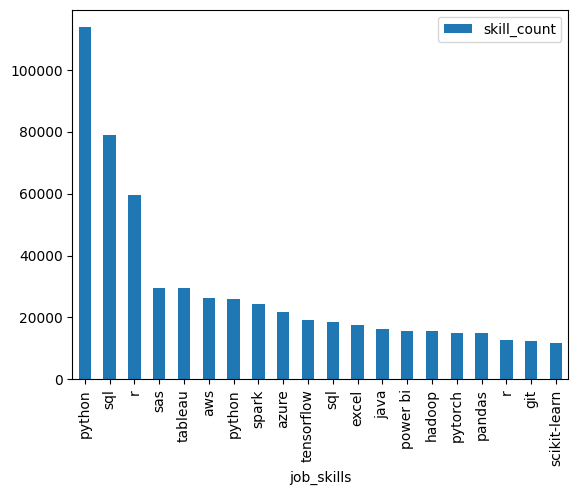

In [487]:
data_scientist_plot = skill_counts[skill_counts['job_title_short'].isin(data_scientist_skills)].sort_values(by='skill_count',ascending=False).set_index('job_skills').drop('job_title_short',axis=1).head(20)
data_scientist_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

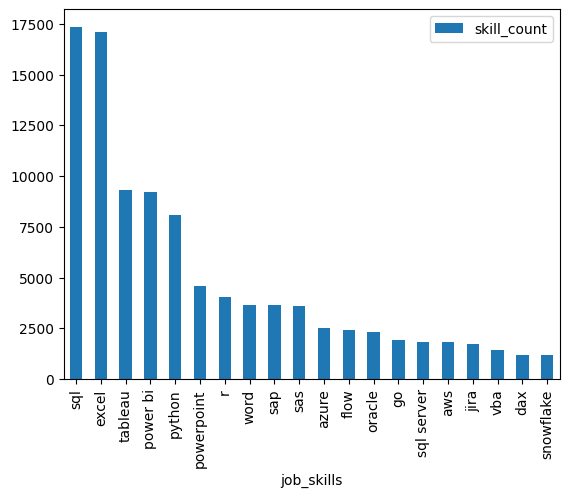

In [488]:
business_analyst_plot = skill_counts[skill_counts['job_title_short'] == business_analyst_skills].set_index('job_skills').sort_values(by='skill_count',ascending=False).drop('job_title_short',axis=1).head(20)
business_analyst_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

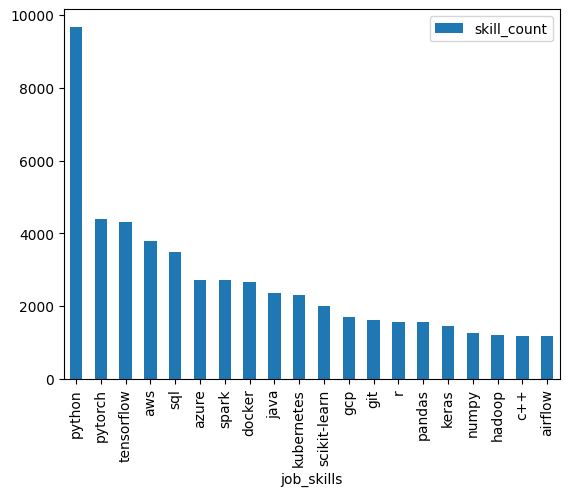

In [489]:
mahchine_learning_engineer_plot = skill_counts[skill_counts['job_title_short'] == mahchine_learning_engineer_skills].set_index('job_skills').drop('job_title_short',axis=1).sort_values(by='skill_count',ascending=False).head(20)
mahchine_learning_engineer_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

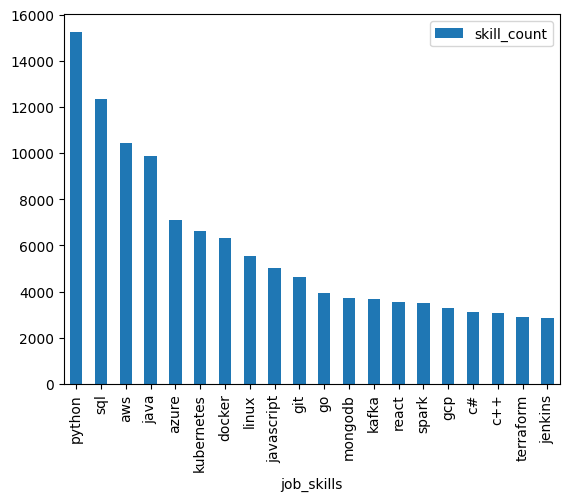

In [490]:
software_engineer_plot = skill_counts[skill_counts['job_title_short'] == software_engineer_skills].set_index('job_skills').drop('job_title_short',axis=1).sort_values(by='skill_count',ascending=False).head(20)
software_engineer_plot.plot(kind='bar')

<Axes: xlabel='job_skills'>

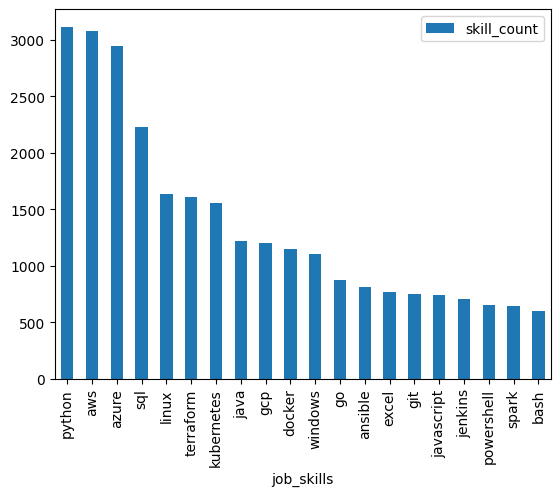

In [491]:
cloud_engineer_plot = skill_counts[skill_counts['job_title_short'] == cloud_engineer_skills].set_index('job_skills').drop('job_title_short',axis=1).sort_values(by='skill_count',ascending=False).head(20)
cloud_engineer_plot.plot(kind='bar')

In [492]:
skill_counts

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [493]:
top_10_skills = dataframe.copy()
top_10_skills['job_skills'] = top_10_skills['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [494]:
top_10_skills = top_10_skills.explode('job_skills')

In [495]:
top_10_skills = top_10_skills.groupby('job_skills').size().sort_values(ascending=False).head(10)

<Axes: xlabel='job_skills'>

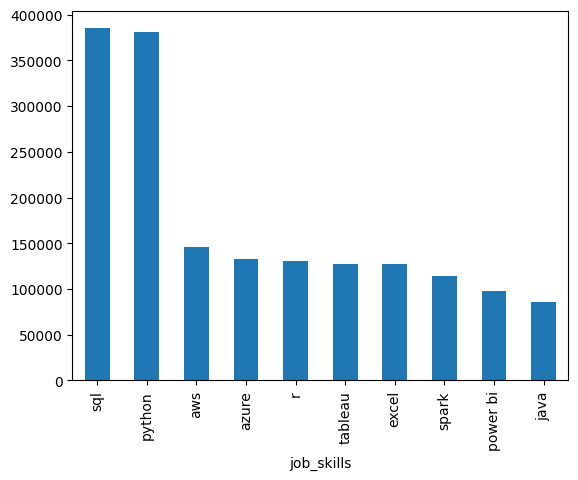

In [496]:
top_10_skills.plot(kind='bar')

In [497]:
top_10_skills

job_skills
sql         384849
python      380909
aws         145381
azure       132527
r           130892
tableau     127213
excel       127018
spark       114609
power bi     98147
java         85612
dtype: int64

In [498]:
top_10_skills_trending = dataframe.copy()

In [499]:
top_10_skills_trending['job_skills'] = top_10_skills_trending['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)

In [500]:
top_10_skills_trending['month_no'] = top_10_skills_trending['job_posted_date'].dt.month

In [501]:
top_10_skills_trending = top_10_skills_trending.explode('job_skills')

In [502]:
top_10_skills_trending.pivot_table(index='month_no',columns='job_skills',aggfunc='size',fill_value=0)

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,5136,36,1509,677,19,965,12,33,71,158,...,0,1530,62,3877,8,15,10,8,255,292
2,3709,15,1150,447,14,696,8,22,51,123,...,0,1205,32,2764,13,8,10,9,186,159
3,3876,14,1092,415,16,757,21,15,50,99,...,0,1109,30,2683,3,6,5,3,185,151
4,3805,17,1068,491,14,726,23,23,38,104,...,0,1156,44,2617,13,2,2,4,157,131
5,3480,24,857,358,7,526,12,20,28,81,...,0,780,19,2044,9,4,3,3,150,128
6,3810,31,1060,398,10,608,21,15,50,91,...,0,952,42,2557,11,11,9,2,192,145
7,3685,21,1015,406,4,634,23,13,73,104,...,0,1115,48,2373,2,3,1,5,174,142
8,4035,34,1175,554,4,761,28,25,47,142,...,0,1405,45,2945,3,3,2,7,222,172
9,3289,18,923,366,7,564,14,29,37,68,...,0,960,39,2253,2,3,14,8,169,129


In [503]:
top_10_skills_trending_pivot = top_10_skills_trending.pivot_table(index='month_no',columns='job_skills',aggfunc='size',fill_value=0)

In [504]:
top_10_skills_trending_pivot.loc['total'] = top_10_skills_trending_pivot.sum()

In [505]:
top_10_skills_trending_pivot

job_skills,airflow,airtable,alteryx,angular,angular.js,ansible,apl,arch,asana,asp.net,...,wimi,windows,wire,word,workfront,wrike,wsl,xamarin,yarn,zoom
month_no,,,,,,,,,,,,,,,,,,,,,
1,5136,36,1509,677,19,965,12,33,71,158,...,0,1530,62,3877,8,15,10,8,255,292
2,3709,15,1150,447,14,696,8,22,51,123,...,0,1205,32,2764,13,8,10,9,186,159
3,3876,14,1092,415,16,757,21,15,50,99,...,0,1109,30,2683,3,6,5,3,185,151
4,3805,17,1068,491,14,726,23,23,38,104,...,0,1156,44,2617,13,2,2,4,157,131
5,3480,24,857,358,7,526,12,20,28,81,...,0,780,19,2044,9,4,3,3,150,128
6,3810,31,1060,398,10,608,21,15,50,91,...,0,952,42,2557,11,11,9,2,192,145
7,3685,21,1015,406,4,634,23,13,73,104,...,0,1115,48,2373,2,3,1,5,174,142
8,4035,34,1175,554,4,761,28,25,47,142,...,0,1405,45,2945,3,3,2,7,222,172
9,3289,18,923,366,7,564,14,29,37,68,...,0,960,39,2253,2,3,14,8,169,129


In [506]:
top_10_skills.index.tolist()

['sql',
 'python',
 'aws',
 'azure',
 'r',
 'tableau',
 'excel',
 'spark',
 'power bi',
 'java']

In [507]:
top_10_skills_trending_pivot = top_10_skills_trending_pivot[top_10_skills.index.tolist()].drop('total',axis=0)

In [508]:
top_10_skills_trending_pivot

job_skills,sql,python,aws,azure,r,tableau,excel,spark,power bi,java
month_no,,,,,,,,,,
1,45774,44889,16805,15385,16351,14805,15087,14304,10660,10447
2,32720,31943,12219,11114,11288,11008,10732,10170,8033,7507
3,32282,31990,12458,11152,11358,10870,10546,9994,7868,7649
4,31096,30482,11635,10557,10647,10430,10562,9234,7792,7294
5,27096,26908,10394,9111,9339,9236,8477,8278,6869,6004
6,31671,31216,11759,10793,10820,10575,10397,9729,8286,6886
7,31869,31257,12017,10960,10793,10758,10301,9085,8500,6818
8,36699,36228,13817,12193,13037,12497,12563,10533,9450,7937
9,28926,28616,10934,10221,9248,9344,9649,8383,7764,6120


In [509]:
top_10_skills_trending_pivot['month']= pd.to_datetime(top_10_skills_trending_pivot.index, format="%m").month_name()

In [510]:
top_10_skills_trending_pivot = top_10_skills_trending_pivot.set_index('month')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

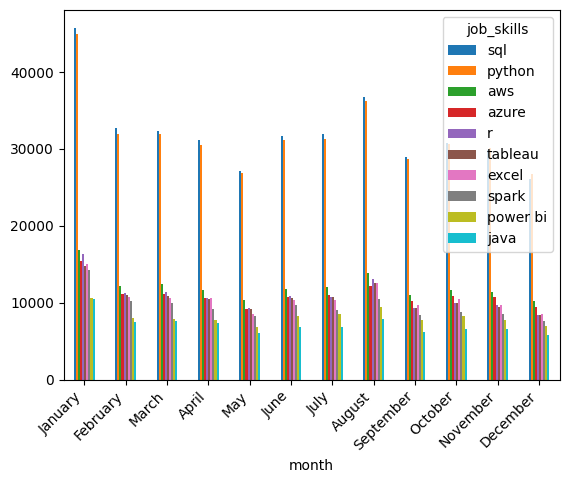

In [511]:
top_10_skills_trending_pivot.plot(kind='bar')
plt.xticks(rotation=45,ha='right')

<Axes: title={'center': 'Data Engineer  top 20 most required skills'}, xlabel='Per 186241 jobs'>

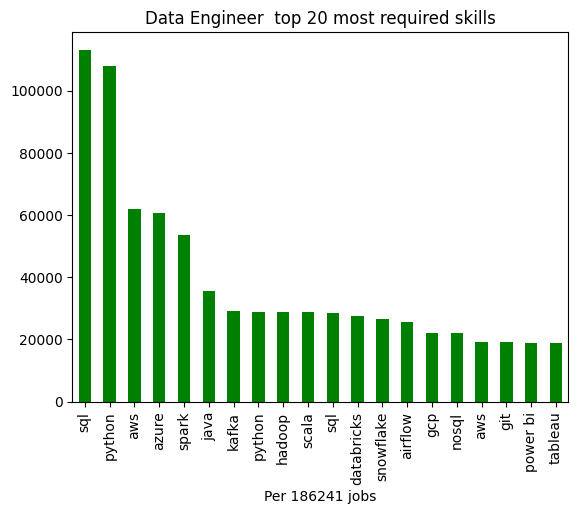

In [512]:
data_engineer_plot.plot(kind='bar',color='green',xlabel=f"Per {dataframe[dataframe['job_title_short'] == 'Data Engineer'].count().iloc[0]} jobs",title='Data Engineer  top 20 most required skills',legend=False)

In [513]:
data_jobs = ['Data Analyst','Data Engineer','Data Scientist']

In [514]:
df = dataframe.copy()
df['job_skills'] = df['job_skills'].apply(lambda skill: ast.literal_eval(skill) if pd.notna(skill) else skill)


In [515]:
df = df.explode('job_skills')

In [516]:
df[df['job_title_short'].isin(data_jobs)]

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_date_year,job_posted_month
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr...",2023,Jan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,spark,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,hadoop,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh...",2023,Mar


In [517]:
df[df['job_title_short'].isin(data_jobs)].groupby(['job_skills','job_title_short']).size().sort_values(ascending=False).head(5)

job_skills  job_title_short
python      Data Scientist     113711
sql         Data Engineer      113130
python      Data Engineer      108022
sql         Data Analyst        92428
            Data Scientist      78982
dtype: int64

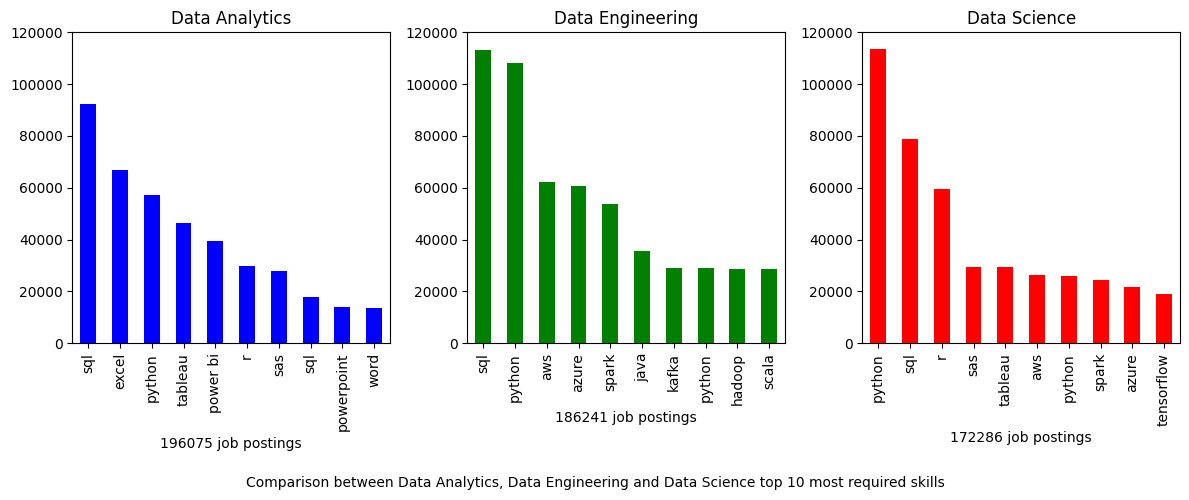

In [518]:
fig, ax = plt.subplots(1,3,figsize=(12,5))
data_analyst_plot.head(10).plot(kind='bar',ax=ax[0],color='blue',title='Data Analytics',xlabel=f"{dataframe[dataframe['job_title_short']=='Data Analyst']['job_title_short'].count()} job postings",ylim=(0,120000),legend=False)
data_engineer_plot.head(10).plot(kind='bar',ax=ax[1],color='green',title='Data Engineering',ylim=(0,120000),xlabel=f"{dataframe[dataframe['job_title_short']=='Data Engineer']['job_title_short'].count()} job postings",legend=False)
data_scientist_plot.head(10).plot(kind='bar',ax=ax[2],color='red',title='Data Science',xlabel=f"{dataframe[dataframe['job_title_short']=='Data Scientist']['job_title_short'].count()} job postings",ylim=(0,120000),legend=False)
fig.supxlabel('Comparison between Data Analytics, Data Engineering and Data Science top 10 most required skills',size=10)
fig.tight_layout()

Text(0.5, 1.0, 'Work from home')

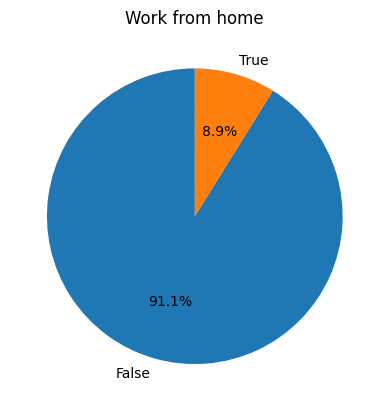

In [544]:
dataframe['job_work_from_home'].value_counts().plot(kind='pie',startangle=90,autopct='%1.1f%%')
plt.ylabel('')
plt.title('Work from home')

Text(0.5, 1.0, 'Job openings in the Tech industry')

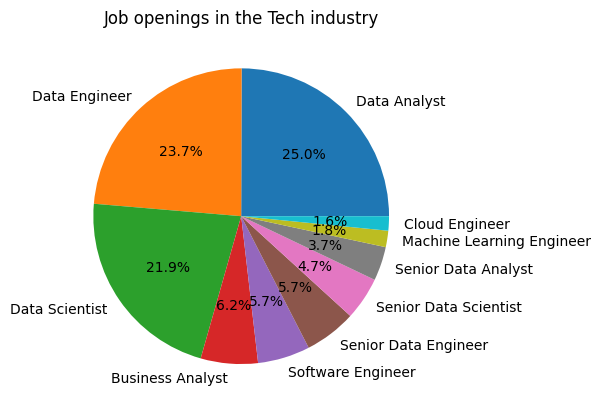

In [545]:
dataframe['job_title_short'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.ylabel('')
plt.title('Job openings in the Tech industry')

Text(0.5, 1.0, 'Job openings in the Tech industry')

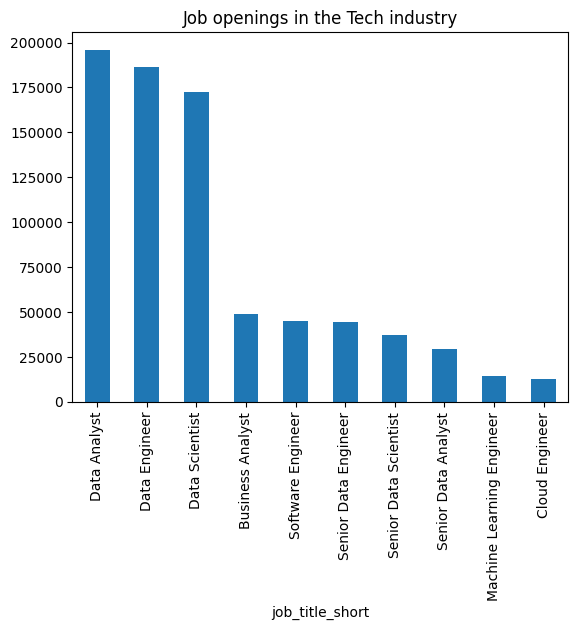

In [532]:
dataframe['job_title_short'].value_counts().plot(kind='bar')
plt.ylabel('')
plt.title('Job openings in the Tech industry')